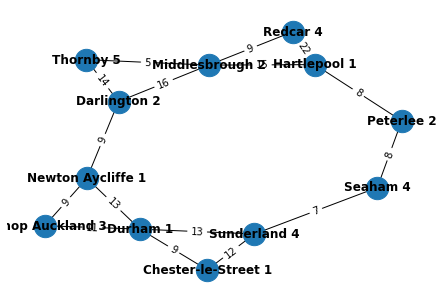

Source Location: Sunderland
Destination: Middlesbrough
visited nodes: [['Sunderland', 11], ['Seaham', 11], ['Chester-le-Street', 13], ['Durham', 14], ['Peterlee', 17], ['Durham', 22], ['Hartlepool', 24], ['Newton Aycliffe', 35], ['Newton Aycliffe', 35], ['Bishop Auckland', 37], ['Bishop Auckland', 37], ['Middlesbrough', 40]]
Best Shortest Path: ['Sunderland', 'Seaham', 'Peterlee', 'Hartlepool', 'Middlesbrough']


In [1]:
# importing networkx
import networkx as nx
import plotly.graph_objects as go
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
#To create an empty graph
G = nx.Graph()

#Graph nodes and weighted edges assigned to E
E = [('Sunderland 4','Chester-le-Street 1',12),
     ('Sunderland 4','Durham 1',13),
     ('Sunderland 4','Seaham 4',7),
     ('Chester-le-Street 1','Sunderland 4',12),
     ('Chester-le-Street 1','Durham 1',9),
     ('Durham 1','Chester-le-Street 1',9),
     ('Durham 1','Sunderland 4',13),
     ('Durham 1','Bishop Auckland 3',13),
     ('Durham 1','Newton Aycliffe 1',13),
     ('Seaham 4','Sunderland 4',7),
     ('Seaham 4','Peterlee 2',8),
     ('Bishop Auckland 3','Durham 1',11),
     ('Bishop Auckland 3','Newton Aycliffe 1',9),
     ('Peterlee 2','Seaham 4',8),
     ('Peterlee 2','Hartlepool 1',8),
     ('Newton Aycliffe 1','Durham 1',13),
     ('Newton Aycliffe 1','Bishop Auckland 3',9),
     ('Newton Aycliffe 1','Darlington 2',9),
     ('Hartlepool 1','Peterlee 2',8),
     ('Hartlepool 1','Middlesbrough 2',15),
     ('Hartlepool 1','Redcar 4',22),
     ('Darlington 2','Newton Aycliffe 1',9),
     ('Darlington 2','Middlesbrough 2',16),
     ('Darlington 2','Thornby 5',14),
     ('Middlesbrough 2','Hartlepool 1',15),
     ('Middlesbrough 2','Darlington 2',16),
     ('Middlesbrough 2','Thornby 5',5),
     ('Middlesbrough 2','Redcar 4',9),
     ('Redcar 4','Middlesbrough 2',9),
     ('Redcar 4','Hartlepool 1',22),
     ('Thornby 5','Middlesbrough 2',5),
     ('Thornby 5','Darlington 2',14)]


#Adding edges from E to the Graph G
G.add_weighted_edges_from(E)
#Taken a Spring layout to display Graph
pos=nx.spring_layout(G)
#mentioned the features to draw graph
nx.draw(G, pos, with_labels=True, font_weight='bold',node_size=500)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
#Displaying the Final Plot
plt.show()


#Defining Parent node with child nodes in dictionary
tree= {
    "Sunderland": [["Chester-le-Street", 12], ["Durham", 13],  ["Seaham", 7]],     
    "Chester-le-Street": [["Sunderland", 12], ["Durham", 9]],
    "Durham": [["Chester-le-Street", 9], ["Sunderland", 13], ["Bishop Auckland", 13],["Newton Aycliffe", 13]],
    "Seaham": [["Sunderland", 7], ["Peterlee", 8]],
    "Bishop Auckland": [["Durham", 11], ["Newton Aycliffe", 9]],
    "Peterlee": [["Seaham", 8], ["Hartlepool", 8]],
    "Newton Aycliffe": [["Durham", 13], ["Bishop Auckland", 9], ["Darlington", 9]],
    "Hartlepool": [["Peterlee", 8], ["Middlesbrough", 15], ["Redcar", 22]],
    "Darlington": [["Newton Aycliffe", 9], ["Middlesbrough", 16], ["Thornby", 14]] ,                    
    "Middlesbrough": [["Hartlepool", 15], ["Darlington", 16], ["Thornby", 5], ["Redcar", 9]],                      
    "Redcar": [["Middlesbrough", 9], ["Hartlepool", 22]],                     
    "Thornby": [["Middlesbrough", 5], ["Darlington", 14]]                     
}             

#Defining heuristic values in dictionary
heuristic = {'Sunderland': 4, 'Chester-le-Street': 1, 'Durham': 1, 'Seaham': 4 , 'Bishop Auckland': 3, 
              'Peterlee': 2, 'Newton Aycliffe': 1, 'Hartlepool': 1, 'Darlington': 2, 
              'Middlesbrough': 2, 'Redcar': 4, 'Thornby': 5}

#Fuction with parameter start - Source and end - Destination
def AStarSearch(start, end):
    #defining tree and heuristic as global keyword
    global tree, heuristic
    #Make a closed empty list
    closed = []
    #put the start Node on the openList
    opened = [[start, 11]]     
    # total cost for nodes visited
    cost = {start: 0}             

    #find the visited nodes
    while True:
        # fn = f(n) = g(n) + h(n)
        fn = [i[1] for i in opened]
        #Finding minimum f(n) value
        chosen_index = fn.index(min(fn))
        #current node
        node = opened[chosen_index][0] 
        #Visited node to add in opened list
        closed.append(opened[chosen_index])
        del opened[chosen_index]
        # break the loop if node Destination has been found
        if closed[-1][0] == end:        
            break
        for item in tree[node]:
            if item[0] in [closed_item[0] for closed_item in closed]:
                continue
                # add nodes to cost dictionary
            cost.update({item[0]: cost[node] + item[1]}) 
            # calculate f(n) of current node
            fn_node = cost[node] + heuristic[item[0]] + item[1]     
            temp = [item[0], fn_node]
            # store f(n) of current node in array opened
            opened.append(temp)                                     

    #find optimal sequence
    # correct optimal tracing node, initialize as node G
    trace_node = end 
    # optimal node sequence
    optimal_sequence = [end]               
    for i in range(len(closed)-2, -1, -1):
        # current node
        check_node = closed[i][0]           
        if trace_node in [children[0] for children in tree[check_node]]:
            children_costs = [temp[1] for temp in tree[check_node]]
            children_nodes = [temp[0] for temp in tree[check_node]]

            #check whether h(n) + g(n) = f(n). If so, append current node to optimal sequence
            #change the correct optimal tracing node to current node
            if cost[check_node] + children_costs[children_nodes.index(trace_node)] == cost[trace_node]:
                optimal_sequence.append(check_node)
                trace_node = check_node
                # reverse the optimal sequence
    optimal_sequence.reverse()              

    return closed, optimal_sequence


def rungraph():
    global start,end
    #Getting the Source Location from User
    start = input("Source Location: ")
    
    if start in tree:
    #Getting the Destination Location from User
        end = input("Destination: ")
        if end in tree:
            #Calling the A star function
            AStarSearch(start, end)
        else:
            #If the input not found
            print("Destination Location does not exists")
            rungraph()
    else:
        #If the input not found
        print("Source Location does not exists")
        rungraph()
rungraph()   


if __name__ == '__main__':
    
    visited_nodes,optimal_nodes  = AStarSearch(start,end)
    #Print the Visited nodes
    print('visited nodes: ' + str(visited_nodes))
    #Print the Best Route
    print('Best Shortest Path: ' + str(optimal_nodes))
     
plt.show()

